## Задача №5

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

Загрузим датасет красных вин и разобьем его на обучающую и тренировочную выборки:

In [10]:
red_wines = pd.read_csv('winequality-red.csv', sep = ';').values
X_red = red_wines[:, :11]
y_red = red_wines[:, 11].astype('int')

marge = int(X_red.shape[0] * 0.9)

X_train_red = X_red[:marge]
y_train_red = y_red[:marge]

X_test_red = X_red[marge:]
y_test_red = y_red[marge:]

#### Обучение градиентного бустинга с квадратичной функцией потерь для 100 деревьев:

In [14]:
gbr = GradientBoostingRegressor(n_estimators=100, loss='ls')
gbr.fit(X_train_red, y_train_red)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

#### Графики среднеквадратичной ошибки в зависимости от количества деревьев:

In [30]:
mse_grad_train = []
for prediction in gbr.staged_predict(X_train_red):
    mse_grad_train.append(mean_squared_error(y_train_red, prediction))

mse_grad_test = []
for prediction in gbr.staged_predict(X_test_red):
    mse_grad_test.append(mean_squared_error(y_test_red, prediction))

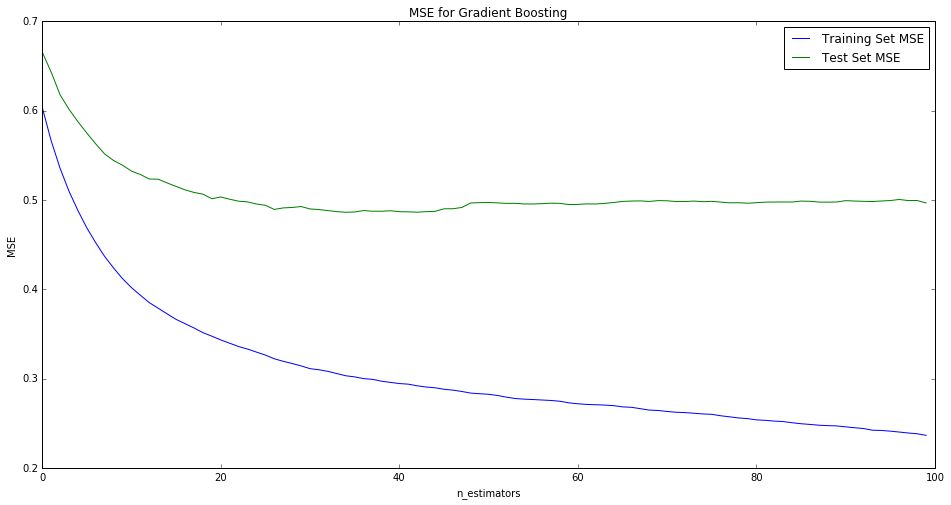

In [31]:
pyplot.figure(figsize=(16, 8))
pyplot.plot(mse_grad_train, label='Training Set MSE')
pyplot.plot(mse_grad_test, label='Test Set MSE')

pyplot.xlabel('n_estimators')
pyplot.ylabel('MSE')

pyplot.title('MSE for Gradient Boosting')
pyplot.legend()

pyplot.show()

#### Обучение random forest с квадратичной функцией потерь для 100 деревьев:

In [32]:
mse_forest_train = []
mse_forest_test = []

for n in range(1, 100):
    rfr = ensemble.RandomForestRegressor(n_estimators=n)
    rfr.fit(X_train_red, y_train_red)
    
    mse_forest_train.append(mean_squared_error(y_train_red, rfr.predict(X_train_red)))
    mse_forest_test.append(mean_squared_error(y_test_red, rfr.predict(X_test_red)))

#### Графики среднеквадратичной ошибки в зависимости от количества деревьев:

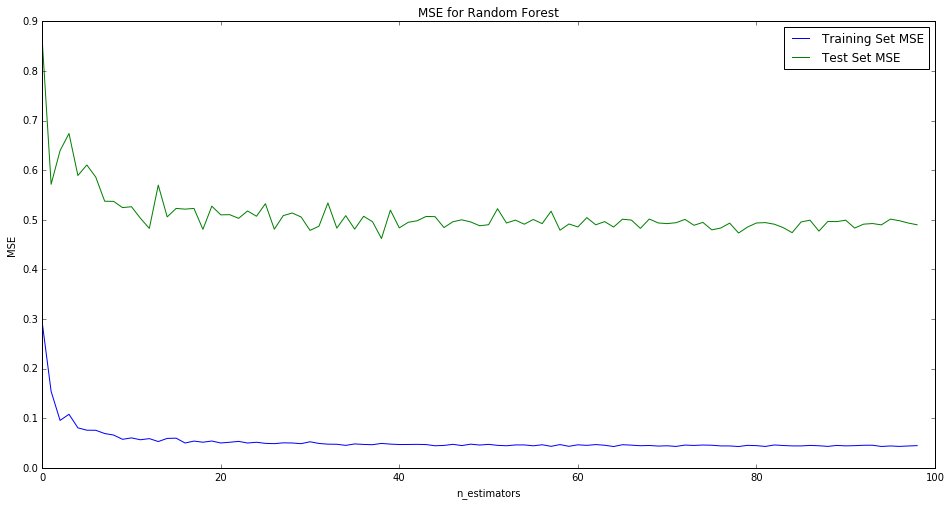

In [34]:
pyplot.figure(figsize=(16, 8))

pyplot.plot(mse_forest_train, label='Training Set MSE')
pyplot.plot(mse_forest_test, label='Test Set MSE')

pyplot.xlabel('n_estimators')
pyplot.ylabel('MSE')

pyplot.title('MSE for Random Forest')
pyplot.legend()

pyplot.show()

На тренировочных выборках Random Forest работает немного лучше, чем Gradient Boosting.
На тестовых выборках они примерно одинаковы.

#### Зависимость качества от глубины дерева:

In [53]:
def visualize(mse_train, mse_test, max_depth):    
    pyplot.figure(figsize=(10, 5))
    
    pyplot.plot(mse_train, label='Training Set MSE')
    pyplot.plot(mse_test, label='Test Set MSE')
    
    pyplot.xlabel('n_estimators')
    pyplot.ylabel('MSE')
    
    pyplot.title('max_depth = %d' % max_depth)  
    pyplot.legend()

Градиентный бустинг:

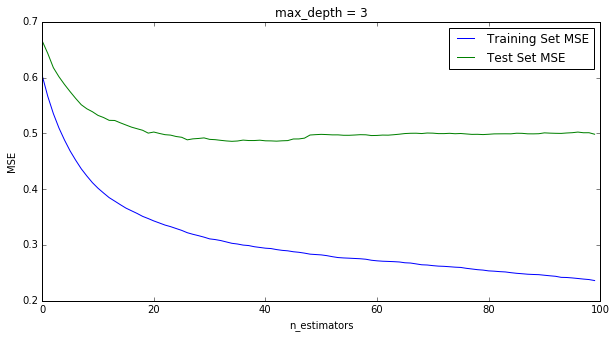

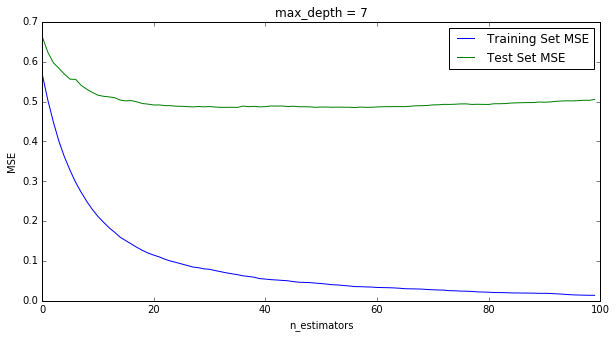

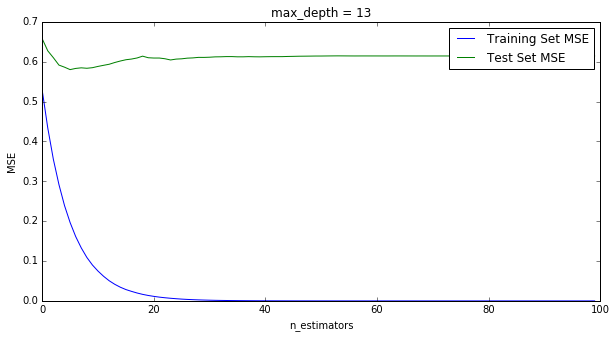

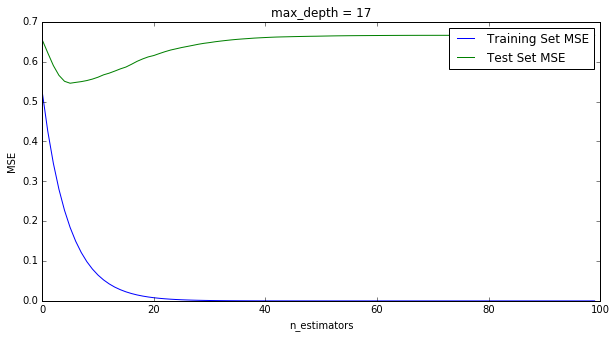

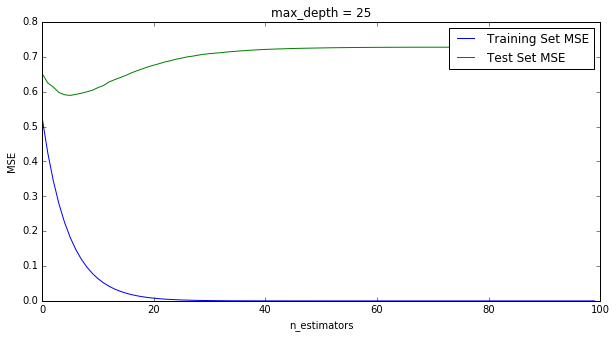

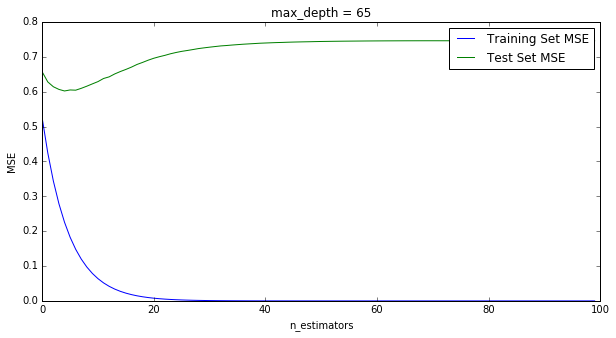

In [54]:
for max_depth in [3, 7, 13, 17, 25, 65]:
    gbr = GradientBoostingRegressor(n_estimators=100, loss='ls', max_depth=max_depth)
    gbr.fit(X_train_red, y_train_red)

    mse_train = []
    for prediction in gbr.staged_predict(X_train_red):
        mse_train.append(mean_squared_error(y_train_red, prediction))

    mse_test = []
    for prediction in gbr.staged_predict(X_test_red):
        mse_test.append(mean_squared_error(y_test_red, prediction))
        
    visualize(mse_train, mse_test, max_depth)

Начиная с max_depth = 13 чет не очень

Random forest:

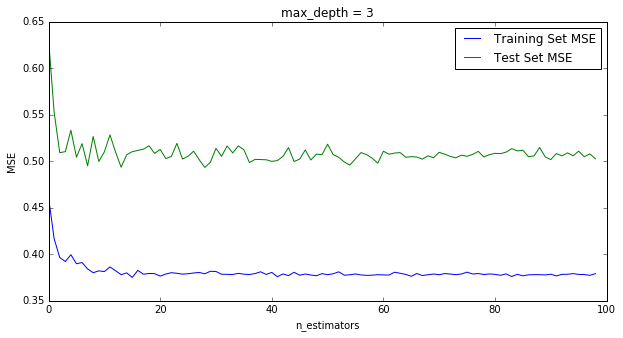

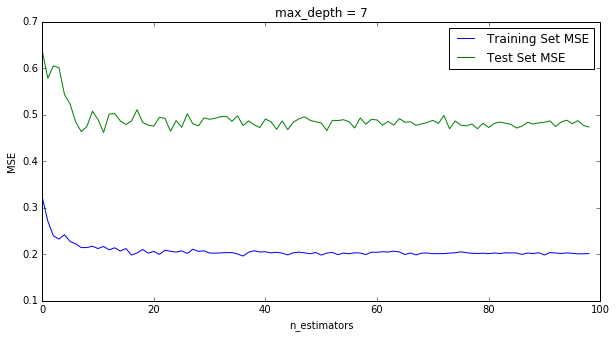

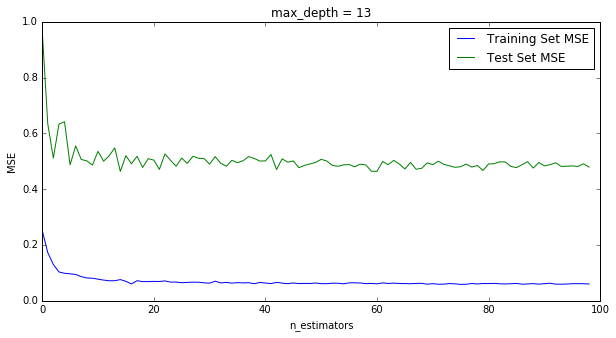

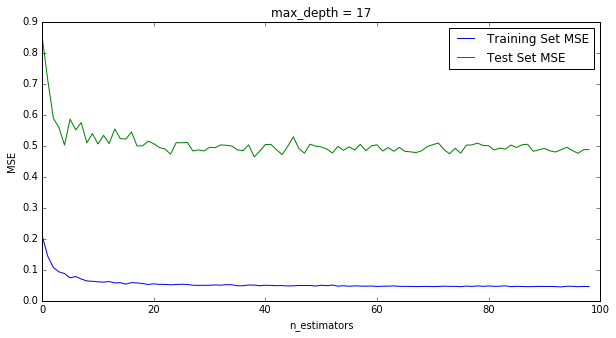

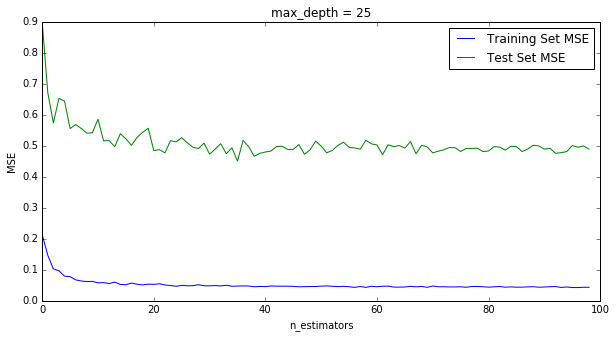

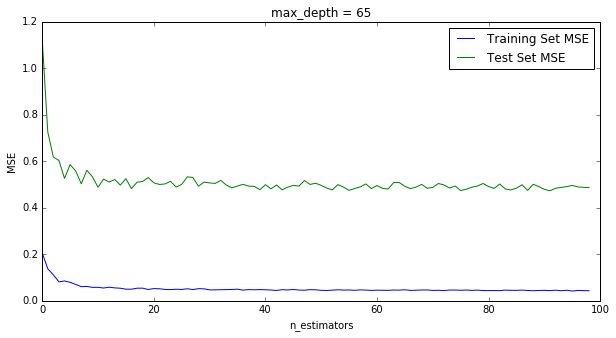

In [55]:
for max_depth in [3, 7, 13, 17, 25, 65]:
    mse_train = []
    mse_test = []
    for n in range(1, 100):
        rfr = ensemble.RandomForestRegressor(n_estimators=n, max_depth=max_depth)
        rfr.fit(X_train_red, y_train_red)
        
        mse_train.append(mean_squared_error(y_train_red, rfr.predict(X_train_red)))
        mse_test.append(mean_squared_error(y_test_red, rfr.predict(X_test_red)))
        
    visualize(mse_train, mse_test, max_depth)

При max_depth<=7 результаты на тестовой выборке примерно одинаковые, но при max_depth>=13 Gradient Boosting, видимо,  переобучается и работает хуже, чем Random Forest.